# Dusha dataset
4+1 classes: Happiness (Positive), Sadness, Anger/Irritation, Neutral + [Other]

https://github.com/salute-developers/golos/tree/master/dusha

https://developers.sber.ru/portal/products/dusha

https://arxiv.org/abs/2212.12266

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=5390f5f18306cac345cf5b5e8b4914258e0d5f92dec41e3b777534c8fe376fa9
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# download dataset files from github

#URL_CROWD:        https://n-ws-q0bez.s3pd12.sbercloud.ru/b-ws-q0bez-jpv/dusha/crowd.tar         # 28 Gb (!)
#URL_PODCAST:      https://n-ws-q0bez.s3pd12.sbercloud.ru/b-ws-q0bez-jpv/dusha/podcast.tar       # 360 Mb
#URL_FEATURES:     https://n-ws-q0bez.s3pd12.sbercloud.ru/b-ws-q0bez-jpv/dusha/features.tar      # 30 Gb (!)
#URL_PAPER_SETUPS: https://n-ws-q0bez.s3pd12.sbercloud.ru/b-ws-q0bez-jpv/dusha/paper_setups.tgz  # 16 Mb

!wget https://n-ws-q0bez.s3pd12.sbercloud.ru/b-ws-q0bez-jpv/dusha/paper_setups.tgz

import os
import tarfile


# extract
if not os.path.exists('paper_setups'):
  with tarfile.open('paper_setups.tgz', 'r:gz') as f:
    f.extractall()

--2024-12-15 10:07:36--  https://n-ws-q0bez.s3pd12.sbercloud.ru/b-ws-q0bez-jpv/dusha/paper_setups.tgz
Resolving n-ws-q0bez.s3pd12.sbercloud.ru (n-ws-q0bez.s3pd12.sbercloud.ru)... 37.230.193.192
Connecting to n-ws-q0bez.s3pd12.sbercloud.ru (n-ws-q0bez.s3pd12.sbercloud.ru)|37.230.193.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16578201 (16M) [application/x-tar]
Saving to: ‘paper_setups.tgz’

paper_setups.tgz    100%[===================>]  15.81M  5.87MB/s    in 2.7s    

2024-12-15 10:07:40 (5.87 MB/s) - ‘paper_setups.tgz’ saved [16578201/16578201]



In [ ]:
# load dataset metadata
from io import StringIO


data_path = 'paper_setups/dusha_large.jsonl'
with open(data_path) as f: data = f.read()

df = pd.read_json(StringIO(data), lines=True)
df.head()

,id,tensor,wav_length,label,emotion
0,857b7099a4f5766105d166e2283066fa,../features/857b7099a4f5766105d166e2283066fa.npy,4.4,2,neutral
1,2107b749055d85d7c09ac49fd30e3feb,../features/2107b749055d85d7c09ac49fd30e3feb.npy,3.8,2,neutral
2,700b3a5644a0824831848c346d11c7d6,../features/700b3a5644a0824831848c346d11c7d6.npy,2.5,2,neutral
3,e8c053899135f139e9527c1388790e36,../features/e8c053899135f139e9527c1388790e36.npy,1.7,2,neutral
4,7fe59996e0f93b8a63e28aacf480004b,../features/7fe59996e0f93b8a63e28aacf480004b.npy,1.9,2,neutral


In [ ]:
# download podcast WAVs (~8 Gb) - see https://github.com/salute-developers/golos/issues/1

DATA_FILE = 'podcast_wavs.tar.gz'
URL = 'https://drive.google.com/uc?id=1OxIwOoJHXrn1c-NdJhVS-0OsyG1kMwFf'

gdown.download(URL, DATA_FILE, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1OxIwOoJHXrn1c-NdJhVS-0OsyG1kMwFf
From (redirected): https://drive.google.com/uc?id=1OxIwOoJHXrn1c-NdJhVS-0OsyG1kMwFf&confirm=t&uuid=53f89e88-89dd-4ecb-8477-c72c5d0af9d2
To: /content/podcast_wavs.tar.gz
100%|██████████| 8.63G/8.63G [01:55<00:00, 74.5MB/s]


'podcast_wavs.tar.gz'

In [ ]:
# extract WAVs
import os
import tarfile
import re


if not os.path.exists('podcast_wavs'):
  with tarfile.open(DATA_FILE, 'r:gz') as f:
    f.extractall('podcast_wavs')

# Class balance

<Axes: xlabel='Count', ylabel='emotion'>

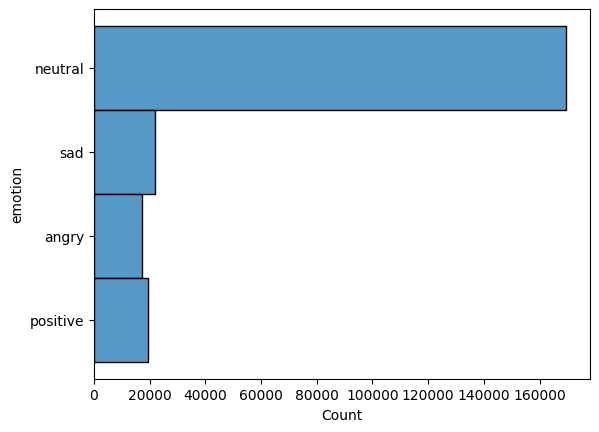

In [ ]:
sns.histplot(data=df, y='emotion')

# Word cloud

In [ ]:
# "We have transcriptions for the crowd part only for the time being..." - see https://github.com/salute-developers/golos/issues/3

#URL_CROWD:        https://n-ws-q0bez.s3pd12.sbercloud.ru/b-ws-q0bez-jpv/dusha/crowd.tar         # 28 Gb (!)

!wget https://n-ws-q0bez.s3pd12.sbercloud.ru/b-ws-q0bez-jpv/dusha/crowd.tar

import os
import tarfile

# extract
if not os.path.exists('crowd'):
  with tarfile.open('crowd.tar') as f:
    f.extractall('crowd')

--2024-12-15 10:03:27--  https://n-ws-q0bez.s3pd12.sbercloud.ru/b-ws-q0bez-jpv/dusha/podcast.tar
Resolving n-ws-q0bez.s3pd12.sbercloud.ru (n-ws-q0bez.s3pd12.sbercloud.ru)... 37.230.193.192
Connecting to n-ws-q0bez.s3pd12.sbercloud.ru (n-ws-q0bez.s3pd12.sbercloud.ru)|37.230.193.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 399349760 (381M) [application/x-tar]
Saving to: ‘podcast.tar.1’

podcast.tar.1       100%[===================>] 380.85M  1.70MB/s    in 2m 18s  

2024-12-15 10:05:46 (2.75 MB/s) - ‘podcast.tar.1’ saved [399349760/399349760]



In [ ]:
# TODO: load crowd dataset with speaker text


In [ ]:
!pip install stop-words

In [ ]:
import re
from wordcloud import WordCloud
from stop_words import get_stop_words


STOPWORDS_RU = get_stop_words('russian')

# TODO: text is present only for 'crowd' part of the dataset (can be found in the crowd.zip)
text = ''
text = re.sub(r'==.*?==+', '', text)
text = text.replace('\n', ' ')

wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      random_state=42,
                      background_color='black',
                      margin=10,
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = STOPWORDS_RU).generate(text)

plt.Figure(figsize=(100, 75))
plt.imshow(wordcloud)
plt.axis("off")